# Students : Hazim Benslimane, Christopher Jabea, Dylan Rachwal, Alexandre Thouvenot 

## Project of Machine learning for classification on the 2 datasets Banknote Authentication and Chronic Kidney Disease

In [1]:
%matplotlib inline
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier
from sklearn.tree import export_graphviz
from sklearn.decomposition import PCA
from graphviz import Source
from functions import *


mpl.style.use("ggplot")

Populating the interactive namespace from numpy and matplotlib


# Import Dataset Banknote

In [2]:
columns_name = ['variance', 'skewness','curtosis','entropy','class']
X,Y,class_labels = load_data("data_banknote_authentication.txt", False, columns_name)
X = min_max_normalization(X)

In [3]:
X_train, X_test, Y_train, Y_test = split_data(X, Y, 900)

## PCA

In [4]:
type(Y_train)

numpy.ndarray

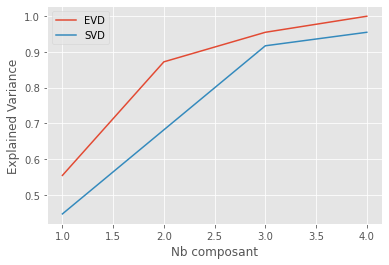

In [5]:
# PCA based on EVD decomposition
pca_evd = PCA_dec(X)

# PCA based on SVD decompostion 
pca_svd = PCA(n_components=4)
pca_svd.fit(X)

plt.plot(range(1,5), pca_evd.exp_variance(), label="EVD")
plt.plot(range(1,5), 1-pca_svd.explained_variance_ratio_, label="SVD")
plt.xlabel('Nb composant')
plt.ylabel('Explained Variance')
plt.legend()
plt.show()

In [6]:
X_pca_2 = pca_evd.PCA_decomposition(2)

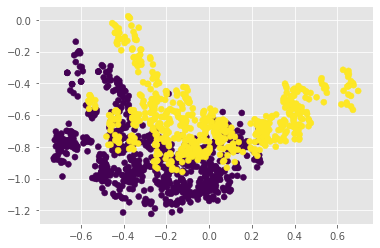

In [7]:
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=Y)
plt.show()

In [8]:
X_pca_3 = pca_evd.PCA_decomposition(3)

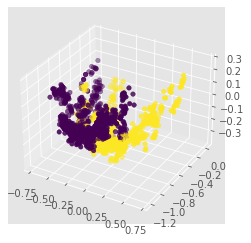

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_3[:,0], X_pca_3[:,1], X_pca_3[:,2], c=Y)
plt.show()

## KNN Analysis

In [10]:
X_train.values[[0,1,2],:]

array([[0.87779533, 0.83979989, 0.10316411, 0.64009747],
       [0.74359085, 0.64328131, 0.23663644, 0.77119543],
       [0.4070845 , 0.63956565, 0.16772137, 0.59588823]])

# Complete

## SVM

In [11]:
model_svm, Y_pred_SVM = predict_SVC(X_train, X_test, Y_train)

In [14]:
scoring = ['precision_macro', 'recall_macro', 'roc_auc', 'f1']
cv = 50

scores = multiple_prediction_scores(model_svm, X, Y, cv = cv,  scoring=scoring)

In [15]:
for key in enumerate (scores.keys()):
    print (key[1])
    print((scores[key[1]].mean(), scores[key[1]].std()))

fit_time
(0.011557912826538086, 0.0013624534171375884)
score_time
(0.004641942977905274, 0.0006845476352992122)
test_precision_macro
(0.9806025641025642, 0.02737990301442681)
test_recall_macro
(0.9822083333333335, 0.0267291260716761)
test_roc_auc
(0.9993504273504275, 0.002802636955807138)
test_f1
(0.9793865689865691, 0.02983826866785704)


SVCModel Train Score is :  0.9811111111111112
SVCModel Test Score is :  0.9766949152542372


C:\Users\dylan\miniconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


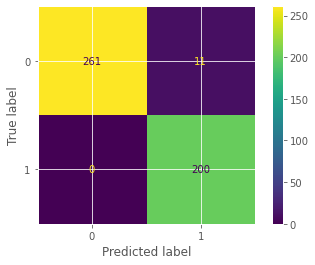

In [13]:
print('SVCModel Train Score is : ' , model_svm.score(X_train, Y_train))
print('SVCModel Test Score is : ' , model_svm.score(X_test, Y_test))
display_confusion_matrix(model_svm,X_test,Y_test, Y_pred_SVM);

In [ ]:
tab_log_tree = find_best_depths(X,Y,cvp=True)

Text(0, 0.5, 'Negative Log Loss')

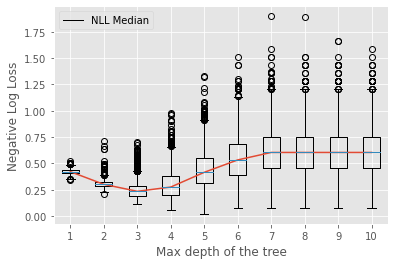

In [23]:
plt.boxplot(tab_log_tree)
plt.plot(linspace(1, 10, 10),[np.median(x) for x in tab_log_tree])
plt.legend(['NLL Median'])
xlabel('Max depth of the tree')
ylabel('Negative Log Loss')

In [22]:
class_forest = RandomForestClassifier(max_depth=3, n_estimators=1000)
class_forest.fit(X, Y)
pred_forest = class_forest.predict(X)



ValueError: could not convert string to float: 'normal'

## Import Dataset Kidney disease

In [17]:
X,Y,class_labels = load_data("kidney_disease.csv", True)

In [18]:
X_train, X_test, Y_train, Y_test = split_data(X, Y, 200)

## SVM

In [19]:
model_svm, Y_pred_SVM = predict_SVC(X_train, X_test, Y_train)

In [20]:
scoring = ['precision_macro', 'recall_macro', 'roc_auc', 'f1']
cv = 50

scores = multiple_prediction_scores(model_svm, X, Y, cv = cv,  scoring=scoring)

In [21]:
for key in enumerate (scores.keys()):
    print (key[1])
    print((scores[key[1]].mean(), scores[key[1]].std()))

fit_time
(0.01402482509613037, 0.0014512727151577084)
score_time
(0.004657564163208008, 0.000515228940826131)
test_precision_macro
(1.0, 0.0)
test_recall_macro
(1.0, 0.0)
test_roc_auc
(1.0, 0.0)
test_f1
(1.0, 0.0)


SVCModel Train Score is :  1.0
SVCModel Test Score is :  0.99


C:\Users\dylan\miniconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


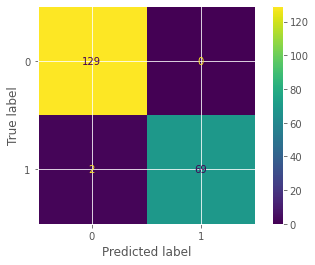

In [22]:
print('SVCModel Train Score is : ' , model_svm.score(X_train, Y_train))
print('SVCModel Test Score is : ' , model_svm.score(X_test, Y_test))
display_confusion_matrix(model_svm,X_test,Y_test, Y_pred_SVM);

# KNN clustering